# Convolutional Autoencoder

Sticking with the MNIST dataset, let's improve our autoencoder's performance using convolutional layers. Again, loading modules and the data.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from scipy.misc import imsave
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16|
import collections
import time
import math

# Import GEI dataset 

(128, 88)


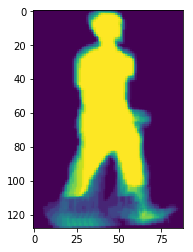

In [6]:
img = imread('{}'.format(os.path.join('./OULP-C1V2_Pack/OULP-GEI-(88x128)-10f/Seq00/0000024', '0000024_55_GEI_10f.png')))
# img = imresize(img, [64, 64], interp='nearest')
print(img.shape)
plt.imshow(img)
plt.show()

In [26]:
# Create Training Data
path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-1f_6/Seq01'
Seq_10f_list = os.listdir(path)
# Seq_10f_list.remove('.DS_Store')

Seq = []
for each_seq in Seq_10f_list:
    seq_path = os.path.join(path, each_seq)
    GEI = []
    for each_GEI in os.listdir(seq_path):
        img = imread('{}'.format(os.path.join(seq_path, each_GEI)))
        img = imresize(img, [64, 64], interp='nearest')
        GEI.append(img)
    Seq.append(np.array(GEI))
Seq = np.array(Seq)
Seq1 = np.ndarray([len(Seq),4,64,64], dtype=float)
for ii, each in enumerate(Seq):
    Seq1[ii] = each

In [27]:
with open('../gait_data/OULP_GEI/GEI64x64_1f_6_Seq01', 'wb') as f:
    np.save(f, Seq1)

# Checkpoint 1

In [2]:
gallery_3f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_Seq00', mode='rb'))
probe_3f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_Seq01', mode='rb'))
gallery_1f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_Seq00', mode='rb'))
probe_1f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_Seq01', mode='rb'))

gallery_3f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_2_Seq00', mode='rb'))
probe_3f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_2_Seq01', mode='rb'))
gallery_1f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_2_Seq00', mode='rb'))
probe_1f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_2_Seq01', mode='rb'))

gallery_3f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_3_Seq00', mode='rb'))
probe_3f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_3_Seq01', mode='rb'))
gallery_1f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_3_Seq00', mode='rb'))
probe_1f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_3_Seq01', mode='rb'))

gallery_3f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_4_Seq00', mode='rb'))
probe_3f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_4_Seq01', mode='rb'))
gallery_1f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_4_Seq00', mode='rb'))
probe_1f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_4_Seq01', mode='rb'))

gallery_3f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_5_Seq00', mode='rb'))
probe_3f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_5_Seq01', mode='rb'))
gallery_1f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_5_Seq00', mode='rb'))
probe_1f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_5_Seq01', mode='rb'))

gallery_3f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_6_Seq00', mode='rb'))
probe_3f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_3f_6_Seq01', mode='rb'))
gallery_1f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_6_Seq00', mode='rb'))
probe_1f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_1f_6_Seq01', mode='rb'))

In [3]:
gallery_3f = gallery_3f/float(255)
probe_3f = probe_3f/float(255)
gallery_1f = gallery_1f/float(255)
probe_1f = probe_1f/float(255)

gallery_3f_2 = gallery_3f_2/float(255)
probe_3f_2 = probe_3f_2/float(255)
gallery_1f_2 = gallery_1f_2/float(255)
probe_1f_2 = probe_1f_2/float(255)

gallery_3f_3 = gallery_3f_3/float(255)
probe_3f_3 = probe_3f_3/float(255)
gallery_1f_3 = gallery_1f_3/float(255)
probe_1f_3 = probe_1f_3/float(255)

gallery_3f_4 = gallery_3f_4/float(255)
probe_3f_4 = probe_3f_4/float(255)
gallery_1f_4 = gallery_1f_4/float(255)
probe_1f_4 = probe_1f_4/float(255)

gallery_3f_5 = gallery_3f_5/float(255)
probe_3f_5 = probe_3f_5/float(255)
gallery_1f_5 = gallery_1f_5/float(255)
probe_1f_5 = probe_1f_5/float(255)

gallery_3f_6 = gallery_3f_6/float(255)
probe_3f_6 = probe_3f_6/float(255)
gallery_1f_6 = gallery_1f_6/float(255)
probe_1f_6 = probe_1f_6/float(255)

In [ ]:
# Train X
train_x = np.concatenate([gallery_1f[:2146, 3], probe_1f[:2146, 3], gallery_1f_2[:2146, 3], 
                          probe_1f_2[:2146, 3], gallery_1f_3[:2146, 3], probe_1f_3[:2146, 3],
                          gallery_1f_4[:2146, 3], probe_1f_4[:2146, 3], gallery_1f_5[:2146, 3], 
                          probe_1f_5[:2146, 3], gallery_1f_6[:2146, 3], probe_1f_6[:2146, 3]], axis=0)
train_x = np.reshape(train_x, [train_x.shape[0], train_x.shape[1], train_x.shape[2], 1])
# Train Y
train_y = np.concatenate([gallery_3f[:2146, 3], probe_3f[:2146, 3], gallery_3f_2[:2146, 3], 
                          probe_3f_2[:2146, 3], gallery_3f_3[:2146, 3], probe_3f_3[:2146, 3],
                          gallery_3f_4[:2146, 3], probe_3f_4[:2146, 3], gallery_3f_5[:2146, 3], 
                          probe_3f_5[:2146, 3], gallery_3f_6[:2146, 3], probe_3f_6[:2146, 3]], axis=0)
train_y = np.reshape(train_y, [train_y.shape[0], train_y.shape[1], train_y.shape[2], 1])
print('train_x', train_x.shape, 'train_y', train_y.shape)

# Val X
val_x = np.concatenate([gallery_1f[2146:2646, 3], gallery_1f_2[2146:2646, 3], gallery_1f_3[2146:2646, 3],
                        gallery_1f_4[2146:2646, 3], gallery_1f_5[2146:2646, 3], gallery_1f_6[2146:2646, 3],
                        probe_1f[2146:2646, 3], probe_1f_2[2146:2646, 3], probe_1f_3[2146:2646, 3], 
                        probe_1f_4[2146:2646, 3], probe_1f_5[2146:2646, 3], probe_1f_6[2146:2646, 3]], axis=0)
val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# Val Y
val_y = np.concatenate([gallery_3f[2146:2646, 3], gallery_3f_2[2146:2646, 3], gallery_3f_3[2146:2646, 3], 
                        gallery_3f_4[2146:2646, 3], gallery_3f_5[2146:2646, 3], gallery_3f_6[2146:2646, 3], 
                        probe_3f[2146:2646, 3], probe_3f_2[2146:2646, 3], probe_3f_3[2146:2646, 3], 
                        probe_3f_4[2146:2646, 3], probe_3f_5[2146:2646, 3], probe_3f_6[2146:2646, 3]], axis=0)
val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
print('val_x', val_x.shape, 'val_y', val_y.shape)

# Test X
test_x = np.concatenate([gallery_1f[2646:, 3], gallery_1f_2[2646:, 3], gallery_1f_3[2646:, 3],
                         gallery_1f_4[2646:, 3], gallery_1f_5[2646:, 3], gallery_1f_6[2646:, 3], 
                         probe_1f[2646:, 3], probe_1f_2[2646:, 3], probe_1f_3[2646:, 3],
                         probe_1f_4[2646:, 3], probe_1f_5[2646:, 3], probe_1f_6[2646:, 3]], 
                        axis=0)
test_x = np.reshape(test_x, [test_x.shape[0], test_x.shape[1], test_x.shape[2], 1])
# Test Y
test_y = np.concatenate([gallery_3f[2646:, 3], gallery_3f_2[2646:, 3], gallery_3f_3[2646:, 3], 
                         gallery_3f_4[2646:, 3], gallery_3f_5[2646:, 3], gallery_3f_6[2646:, 3], 
                         probe_3f[2646:, 3], probe_3f_2[2646:, 3], probe_3f_3[2646:, 3], probe_3f_4[2646:, 3], 
                         probe_3f_5[2646:, 3], probe_3f_6[2646:, 3]], axis=0)
test_y = np.reshape(test_y, [test_y.shape[0], test_y.shape[1], test_y.shape[2], 1])
print('test_x', test_x.shape, 'test_y', test_y.shape)

In [11]:
# Create Training Data
path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-1f/Seq00'
Subjects_list = os.listdir(path)
# Seq_10f_list.remove('.DS_Store')

# get subjects ID
Train_subjects = Subjects_list[:2146]
Val_subjects = Subjects_list[2146:2646]
Test_subjects = Subjects_list[2646:]
GEI_85 = os.listdir(seq_path)[3]

def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)
        target_batch = np.array(target_batch)
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield data_batch, target_batch
    

    
    for each_GEI in os.listdir(seq_path):
#         img = imread('{}'.format(os.path.join(seq_path, each_GEI)))
#         img = imresize(img, [64, 64], interp='nearest')
#         GEI.append(img)
#     Seq.append(np.array(GEI))
# Seq = np.array(Seq)
# Seq1 = np.ndarray([len(Seq),4,64,64], dtype=float)
# for ii, each in enumerate(Seq):
#     Seq1[ii] = each

FileNotFoundError: [Errno 2] No such file or directory: './OULP-C1V2_Pack/OULP-GEI-(88x128)-1f_6/Seq01'

In [ ]:
def get_batches(path_data_X=[1,2,3], path_data_Y=[1,2,3], num_training, num_validation, num_test,
                target, batch_size):
    
    '''
    path_data_X: a list includes all the pathes of input data (both gallery and probe)
    path_data_Y: same as path_data_X, but the parameters of these two must positional corresponding
    
    '''
    
    # load different type of incomplete GEIs and their corresponding targets
    new_train_X = []
    new_train_Y = []
    new_val_X = []
    new_val_Y = []
    new_test_X = []
    new_test_Y = []
    
    for ii, (path_X, path_Y) in enumerate(zip(path_data_X, path_data_Y):
        data_X = np.load(open(path_X, mode='rb'))/float(255)
        data_Y = np.load(open(path_Y, mode='rb'))/float(255) 
                                          
        new_train_X = np.concatenate([new_train_X, data_X[:num_training,3]], axis=0)
        new_train_Y = np.concatenate([new_train_Y, data_Y[:num_training,3]], axis=0)
                                          
        new_val_X = np.concatenate([new_val_X, data_X[num_training:num_training + num_validation,3]], axis=0)
        new_val_Y = np.concatenate([new_val_Y, data_Y[num_training:num_training + num_validation,3]], axis=0)
                                          
        new_test_X = np.concatenate([new_test_X, data_X[num_training + num_validation:,3]], axis=0)
        new_test_Y = np.concatenate([new_test_Y, data_Y[num_training + num_validation:,3]], axis=0)
                                                  
    # reshape the loaded train_X and train_Y
    new_train_X = np.reshape(new_train_X, [new_train_X.shape[0], new_train_X.shape[1], new_train_X.shape[2], 1])
    new_train_Y = np.reshape(new_train_Y, [new_train_Y.shape[0], new_train_Y.shape[1], new_train_Y.shape[2], 1])
    new_val_X = np.reshape(new_val_X, [new_val_X.shape[0], new_val_X.shape[1], new_val_X.shape[2], 1])
    new_val_Y = np.reshape(new_val_Y, [new_val_Y.shape[0], new_val_Y.shape[1], new_val_Y.shape[2], 1])
    new_test_X = np.reshape(new_test_X, [new_test_X.shape[0], new_test_X.shape[1], new_test_X.shape[2], 1])
    new_test_Y = np.reshape(new_test_Y, [new_test_Y.shape[0], new_test_Y.shape[1], new_test_Y.shape[2], 1])
                                                            
    data_Y00 = np.load(open(path_data_Y00, mode='rb'))
    data_Y01 = np.load(open(path_data_Y01, mode='rb'))
    
    n_batches = len(data)//batch_size
    data = data[:batch_size * n_batches]
    target = target[:batch_size * n_batches]
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = data[ii:ii + batch_size]
        target_batch = target[ii:ii + batch_size]
        
        yield data_batch, target_batch

In [ ]:
get_batches(r'../gait_data/OULP_GEI/GEI64x64_1f_Seq00', 
            r'../gait_data/OULP_GEI/GEI64x64_1f_Seq01',
            r'../gait_data/OULP_GEI/GEI64x64_1f_2_Seq00',
            r'../gait_data/OULP_GEI/GEI64x64_1f_2_Seq01',
            
            data_Y, target, batch_size)

<br><br><br><br><br><br><br><br><br>

# Create Graph

In [5]:
def build_inputs_outputs():
    inputs_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='inputs_1')
    targets_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='targets_1')
    
    return inputs_1, targets_1

def conv_layer(inputs_, weights_name, bias_name, conv_name, pool_name, bn_name, relu_name, add_bacth_norm=True, is_training=True, 
               set_stddev=0.03, out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), pool_size=(2,2), pool_strides=(2,2), 
               keep_prob=0.5):
    ### Encoder
    # e.g. out_dim: 8; kern_size: (3,3); pool_size: (2,2); strides: (2,2);
        
    # filter:[filter_height, filter_width, in_channels, out_channels]
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         inputs_.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name) 
    
    # Set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    # input:[batch, in_height, in_width, in_channels]
    conv2d = tf.nn.bias_add(tf.nn.conv2d(inputs_, weight, stride, padding='SAME', name=conv_name), bias)
    
    # add activation function
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    # add Max pooling
    conv2d = tf.nn.max_pool(conv2d, [1,pool_size[0],pool_size[1],1],\
                                    [1,pool_strides[0],pool_strides[1],1], padding='SAME', name=pool_name)   
    # Now 28x28x
    if add_bacth_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
        
    conv2d_maxpool = tf.layers.dropout(conv2d, rate=keep_prob)
        
    return conv2d_maxpool

#     # Now 14x14x16
#     conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
#     # Now 7x7x8
#     conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 7x7x8
#     encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
#     # Now 4x4x8

def deconv_layer(encoded, up_name, weights_name, bias_name, de_conv_name, bn_name, relu_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, up_size=[(2,2),(4,4),(5,5),(6,6)], out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), keep_prob=0.5):
    ### Decoder
    upsample = tf.image.resize_nearest_neighbor(encoded, up_size, name=up_name) # up_size: e.g.(7,7)
    
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         upsample.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    conv2d = tf.nn.bias_add(tf.nn.conv2d(upsample, weight, stride, padding='SAME', name=de_conv_name),\
                   bias)
    
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    return conv2d

#     # Now 7x7x8
#     upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
#     # Now 14x14x8
#     conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
#     # Now 28x28x8
#     conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 28x28x16

def output_layer(conv2d, weights_name, bias_name, logits_name, bn_name, decoded_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, out_dim=1, conv_kernsize=(3,3), conv_strides=(1,1)):
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         conv2d.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    logits = tf.nn.bias_add(tf.nn.conv2d(conv2d, weight, stride, padding='SAME', name=logits_name),\
                   bias)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    #Now 28x28x1
    decoded = tf.nn.sigmoid(logits, name=decoded_name)
    
    return logits, decoded

In [6]:
def build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
                de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)]):
    
    # reset graph
    tf.reset_default_graph()
    
    with tf.name_scope('inputs_targets'):
        inputs_1, targets_1 = build_inputs_outputs()
    
    keep_p = tf.placeholder(tf.float32, name="keep_prob")
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    training = tf.placeholder(tf.bool, name='training')
    
    with tf.name_scope('conv_layers'):
        
        maxpool_1 = conv_layer(inputs_1, 'conv_weights_1', 'bias_1', 'conv_1', 'pool_1', 'bn_1', 'relu_1', add_bacth_norm=False, 
                               is_training=training, set_stddev=std, out_dim=128, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 32x32x128
        maxpool_2 = conv_layer(maxpool_1, 'conv_weights_2', 'bias_2', 'conv_2', 'pool_2', 'bn_2', 'relu_2', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=64, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 16x16x64
        maxpool_3 = conv_layer(maxpool_2, 'conv_weights_3', 'bias_3', 'conv_3', 'pool_3', 'bn_3', 'relu_3', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=32, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 8x8x32
#         maxpool_4 = conv_layer(maxpool_3, 'conv_weights_4', 'bias_4', 'conv_4', 'pool_4', 'bn_4', 'relu_4', add_bacth_norm=True, 
#                                is_training=training, set_stddev=std, out_dim=8, conv_kernsize=kern_size, conv_strides=conv_strides, 
#                                pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # Now 4x4x8 as hidden layer
        
    with tf.name_scope('deconv_layers'):
        # 8x8x32
        deconv_1 = deconv_layer(maxpool_3, 'up_1', 'deconv_weights_1', 'debias_1', 'deconv_1', 'de_bn_1', 'de_relu_1', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[0], out_dim=32, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        # 16x16x32
        deconv_2 = deconv_layer(deconv_1, 'up_2', 'deconv_weights_2', 'debias_2', 'deconv_2', 'de_bn_2', 'de_relu_2', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[1], out_dim=64, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        # 32x32x64
        deconv_3 = deconv_layer(deconv_2, 'up_3', 'deconv_weights_3', 'debias_3', 'deconv_3', 'de_bn_3', 'de_relu_3', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[2], out_dim=128, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        # 64x64x128
#         deconv_4 = deconv_layer(deconv_3, 'up_4', 'deconv_weights_4', 'debias_4', 'deconv_4', 'de_bn_4', 'de_relu_4', add_batch_norm=True, 
#                               is_training=training, set_stddev=std, up_size=up_size[3], out_dim=64, conv_kernsize=de_kern_size,
#                               conv_strides=de_conv_strides, keep_prob=keep_p)
        
    with tf.name_scope('output_layer'):
       
        logits, decoded = output_layer(deconv_3, 'output_weights', 'outbias_1', 'logits', 'bn', 'decoded', add_batch_norm=False, is_training=training, 
                                       set_stddev=std, out_dim=1, conv_kernsize=out_kern_size, conv_strides=out_strides)
    
    MSE = tf.reduce_mean(tf.losses.mean_squared_error(targets_1, decoded), name='MSE')
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_1, logits=logits, name='loss')
    cost = tf.reduce_mean(loss, name='cost')
#     cost = tf.losses.mean_squared_error(targets_1, decoded)
    opt = tf.train.AdamOptimizer(learning_rate).minimize(MSE)
    
    with tf.name_scope('saver'):
        saver = tf.train.Saver()
        
#     merged = tf.summary.merge_all()
    
    export_nodes = ['inputs_1', 'targets_1', 'maxpool_1', 'maxpool_2', 'maxpool_3', 'deconv_1', 'deconv_2', 
                    'deconv_3', 'training', 'logits', 'decoded', 'loss', 'cost', 'opt', 'saver', 'learning_rate', 'keep_p', 'MSE']
    
    Graph = collections.namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])
    
    return graph

In [7]:
def get_batches(data, target, batch_size):
    n_batches = len(data)//batch_size
    data = data[:batch_size * n_batches]
    target = target[:batch_size * n_batches]
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = data[ii:ii + batch_size]
        target_batch = target[ii:ii + batch_size]
        
        yield data_batch, target_batch
        
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

In [8]:
def train(model, epochs, save_string):

    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        
        iteration = 1
        mean_val_loss = 0
        mean_val_mse = 0
        mean_val_acc = 0
        count_loss_not_decrease_epochs = 0
        count_acc_not_decrease_epochs = 0
        Last_val_loss = 0
        Last_val_mse = 0
        Last_val_acc = 0
        
        
        for e in range(epochs):
            for train_batch, target_batch in get_batches(train_x, train_y, batch_size):
                    
                start = time.time()
                
                feed_1 = {
                        model.inputs_1: train_batch, 
                        model.targets_1: target_batch,
                        model.keep_p: 0.5,
                        model.learning_rate: lr,
                        model.training:True
                        }

                train_loss, _, decoded_img, train_mse = sess.run([model.cost, model.opt, model.decoded, model.MSE], feed_dict=feed_1)
                
                train_acc = cal_accuracy(decoded_img, target_batch)
                
                if iteration%25==0:
                    end = time.time()
#                     acc = calculate_accuracy(sess, pred, target_batch, sq_length)
                    print("Epoch: {}/{},".format(e+1, epochs),' '
                          "Iteration: {},".format(iteration),' '
                          "Train loss: {:.3f},".format(train_loss),' '
                          "Train MSE: {:.4f},".format(train_mse),' '
                          "{:.1f}s /batch.".format((end-start)/5),' '
                          "Train Accuracy: %{:.3f}".format(train_acc))

                ##############################################################
                ######################## VALIDATION ##########################
                ##############################################################
                
                if iteration%75==0:
#                     training = True
                    validation_loss = []
                    validation_mse = []
                    validation_acc = []
                    
                    if batch_size >= len(val_x):
                        val_batch_size = len(val_x)
                    else: 
                        val_batch_size = batch_size
                        

                    for ii, (val_batch, val_target_batch) in enumerate(get_batches(val_x, val_y, val_batch_size)):
#                         print(ii, len(val_x)//val_batch_size)
                        feed_2 = {
                                model.inputs_1: val_batch,
                                model.targets_1: val_target_batch,
                                model.keep_p: 1,
                                model.training:True
                                }
                        
                        val_loss, val_decoded_img, val_mse = sess.run([model.cost, model.decoded, model.MSE], 
                                                                          feed_dict=feed_2)

                        val_acc = cal_accuracy(val_decoded_img, val_target_batch)
                        
                        validation_loss.append(val_loss)
                        validation_mse.append(val_mse)
                        validation_acc.append(val_acc)
                    
                    Last_val_loss = mean_val_loss
                    Last_val_mse = mean_val_mse
                    Last_val_acc = mean_val_acc
                    mean_val_loss = np.mean(np.array(validation_loss))
                    mean_val_mse = np.mean(np.array(validation_mse))
                    mean_val_acc = np.mean(np.array(validation_acc))
                    
                    print()
                    print("Validation loss: {:.3f},".format(mean_val_loss),' '
                          "Validation mse: {:.4f},".format(mean_val_mse),' '
                          "Validation accuracy: %{:.3f},".format(mean_val_acc))
#                           "maxpool_3.shape: {}.".format(max_pool_3[0].shape))
                    print()
                ####### plot #######
#                 if iteration%500==0:
                    
#                     feed_3 = {
#                             model.inputs_1: val_x[:10],
#                             model.keep_p: 1,
#                             model.training:True
#                             }
                    
#                     fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
#                     in_imgs = val_x[:10]
#                     target_imgs = val_y[:10]
#                     reconstructed = sess.run(model.decoded, feed_dict=feed_3)

#                     # plot out
#                     for images, row in zip([in_imgs, target_imgs, reconstructed], axes):
#                         for img, ax in zip(images, row):
#                             ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
#                             ax.get_xaxis().set_visible(False)
#                             ax.get_yaxis().set_visible(False)


#                     fig.tight_layout(pad=0.1)
                            
                    
                    
                    
                    
                iteration += 1
                
            # Early stopping 
            if mean_val_acc > 90.86:
                break
#             if mean_val_Acc - Last_val_Acc <= -0.3:
#                 count_Acc_not_increase_epochs += 1
#             if Last_val_loss - mean_val_loss <= -0.01:
#                 count_loss_not_decrease_epochs += 1
                
#             if mean_val_Acc - Last_val_Acc <= -2:
#                 break
#             if count_Acc_not_increase_epochs >= 10:
#                 break
#             if count_loss_not_decrease_epochs >= 10:
#                 break
                
        model.saver.save(sess, r"{}".format(save_string))

In [9]:
# shuffle
train_x, train_y = shuffle(train_x, train_y)
val_x, val_y = shuffle(val_x, val_y)

In [10]:
### !mkdir checkpoints_view_invariant

dimension = 128
epochs = 3000
num_layers = 3
batch_size = 80
conv_kern_size = (4,4) #
conv_strides = (1,1) ##
pool_size = (2,2)
pool_strides = (2,2)
# up_size = [(8,8), (16,16), (32,32), (64,64)]
up_size = [(16,16), (32,32), (64,64)]
# up_size = [(32,32), (64,64)]
de_kern_size = (4,4) #
de_conv_strides = (1,1) ##
out_kern_size = (4,4) #
out_strides = (1,1)
std = 0.02

for lr in [0.0006]:
#                 log_string = 'logs/4/lr={},nl={},ls={},bs={}'.format(lr, num_layers, lstm_size, batch_size)
    save_string = './checkpoints_view_invariant/1to3_add-more-data_lr={}_nl={}_bs={}_dim={}.ckpt'.format(
                                                                            lr, num_layers, batch_size, dimension)
                
#             writer to_frame= tf.summary.FileWriter(log_string)
#     build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
#                 de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)], set_is_training=True):
    
    model = build_graph(conv_kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, de_conv_strides,
                        out_kern_size, out_strides, up_size=up_size)

    train(model, epochs, save_string)
                
    print(' ')
    print(' ')
    print("leraning_rate={},num_layers={},batch_size={} finished, saved".format(lr, num_layers, batch_size))
    print(' ')
    print(' ')

Epoch: 1/3000,  Iteration: 25,  Train loss: 0.208,  Train MSE: 0.0228,  0.0s /batch.  Train Accuracy: %75.833
Epoch: 1/3000,  Iteration: 50,  Train loss: 0.157,  Train MSE: 0.0147,  0.0s /batch.  Train Accuracy: %81.476
Epoch: 1/3000,  Iteration: 75,  Train loss: 0.153,  Train MSE: 0.0134,  0.0s /batch.  Train Accuracy: %82.854

Validation loss: 0.144,  Validation mse: 0.0127,  Validation accuracy: %83.129,

Epoch: 1/3000,  Iteration: 100,  Train loss: 0.136,  Train MSE: 0.0113,  0.0s /batch.  Train Accuracy: %84.729
Epoch: 1/3000,  Iteration: 125,  Train loss: 0.123,  Train MSE: 0.0092,  0.0s /batch.  Train Accuracy: %85.211
Epoch: 1/3000,  Iteration: 150,  Train loss: 0.121,  Train MSE: 0.0091,  0.0s /batch.  Train Accuracy: %85.294

Validation loss: 0.127,  Validation mse: 0.0099,  Validation accuracy: %84.820,

Epoch: 1/3000,  Iteration: 175,  Train loss: 0.119,  Train MSE: 0.0090,  0.0s /batch.  Train Accuracy: %85.646
Epoch: 1/3000,  Iteration: 200,  Train loss: 0.121,  Train MSE


Validation loss: 0.105,  Validation mse: 0.0057,  Validation accuracy: %88.642,

Epoch: 5/3000,  Iteration: 1525,  Train loss: 0.102,  Train MSE: 0.0058,  0.0s /batch.  Train Accuracy: %88.767
Epoch: 5/3000,  Iteration: 1550,  Train loss: 0.098,  Train MSE: 0.0047,  0.0s /batch.  Train Accuracy: %89.455
Epoch: 5/3000,  Iteration: 1575,  Train loss: 0.108,  Train MSE: 0.0061,  0.0s /batch.  Train Accuracy: %88.377

Validation loss: 0.104,  Validation mse: 0.0056,  Validation accuracy: %88.783,

Epoch: 5/3000,  Iteration: 1600,  Train loss: 0.103,  Train MSE: 0.0055,  0.0s /batch.  Train Accuracy: %88.390
Epoch: 6/3000,  Iteration: 1625,  Train loss: 0.103,  Train MSE: 0.0051,  0.0s /batch.  Train Accuracy: %89.217
Epoch: 6/3000,  Iteration: 1650,  Train loss: 0.103,  Train MSE: 0.0056,  0.0s /batch.  Train Accuracy: %89.004

Validation loss: 0.105,  Validation mse: 0.0058,  Validation accuracy: %88.728,

Epoch: 6/3000,  Iteration: 1675,  Train loss: 0.096,  Train MSE: 0.0048,  0.0s /ba

Epoch: 10/3000,  Iteration: 3000,  Train loss: 0.103,  Train MSE: 0.0048,  0.0s /batch.  Train Accuracy: %89.222

Validation loss: 0.102,  Validation mse: 0.0051,  Validation accuracy: %89.085,

Epoch: 10/3000,  Iteration: 3025,  Train loss: 0.098,  Train MSE: 0.0047,  0.0s /batch.  Train Accuracy: %89.766
Epoch: 10/3000,  Iteration: 3050,  Train loss: 0.096,  Train MSE: 0.0043,  0.0s /batch.  Train Accuracy: %90.011
Epoch: 10/3000,  Iteration: 3075,  Train loss: 0.098,  Train MSE: 0.0045,  0.0s /batch.  Train Accuracy: %89.800

Validation loss: 0.101,  Validation mse: 0.0050,  Validation accuracy: %89.279,

Epoch: 10/3000,  Iteration: 3100,  Train loss: 0.096,  Train MSE: 0.0047,  0.0s /batch.  Train Accuracy: %89.767
Epoch: 10/3000,  Iteration: 3125,  Train loss: 0.099,  Train MSE: 0.0045,  0.0s /batch.  Train Accuracy: %89.955
Epoch: 10/3000,  Iteration: 3150,  Train loss: 0.096,  Train MSE: 0.0044,  0.0s /batch.  Train Accuracy: %90.134

Validation loss: 0.102,  Validation mse: 0.0

Epoch: 14/3000,  Iteration: 4450,  Train loss: 0.093,  Train MSE: 0.0043,  0.0s /batch.  Train Accuracy: %90.159
Epoch: 14/3000,  Iteration: 4475,  Train loss: 0.098,  Train MSE: 0.0047,  0.0s /batch.  Train Accuracy: %89.882
Epoch: 15/3000,  Iteration: 4500,  Train loss: 0.098,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.289

Validation loss: 0.100,  Validation mse: 0.0047,  Validation accuracy: %89.759,

Epoch: 15/3000,  Iteration: 4525,  Train loss: 0.099,  Train MSE: 0.0043,  0.0s /batch.  Train Accuracy: %89.858
Epoch: 15/3000,  Iteration: 4550,  Train loss: 0.097,  Train MSE: 0.0044,  0.0s /batch.  Train Accuracy: %90.327
Epoch: 15/3000,  Iteration: 4575,  Train loss: 0.095,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.394

Validation loss: 0.101,  Validation mse: 0.0049,  Validation accuracy: %89.727,

Epoch: 15/3000,  Iteration: 4600,  Train loss: 0.099,  Train MSE: 0.0045,  0.0s /batch.  Train Accuracy: %89.940
Epoch: 15/3000,  Iteration: 4625,  Train loss

Epoch: 19/3000,  Iteration: 5925,  Train loss: 0.096,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.481

Validation loss: 0.100,  Validation mse: 0.0046,  Validation accuracy: %89.829,

Epoch: 19/3000,  Iteration: 5950,  Train loss: 0.098,  Train MSE: 0.0040,  0.0s /batch.  Train Accuracy: %90.234
Epoch: 19/3000,  Iteration: 5975,  Train loss: 0.094,  Train MSE: 0.0040,  0.0s /batch.  Train Accuracy: %90.685
Epoch: 19/3000,  Iteration: 6000,  Train loss: 0.092,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.620

Validation loss: 0.100,  Validation mse: 0.0047,  Validation accuracy: %89.834,

Epoch: 19/3000,  Iteration: 6025,  Train loss: 0.097,  Train MSE: 0.0042,  0.0s /batch.  Train Accuracy: %90.526
Epoch: 19/3000,  Iteration: 6050,  Train loss: 0.096,  Train MSE: 0.0042,  0.0s /batch.  Train Accuracy: %90.347
Epoch: 19/3000,  Iteration: 6075,  Train loss: 0.094,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.528

Validation loss: 0.099,  Validation mse: 0.0

Epoch: 23/3000,  Iteration: 7375,  Train loss: 0.095,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.832
Epoch: 24/3000,  Iteration: 7400,  Train loss: 0.091,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %90.925
Epoch: 24/3000,  Iteration: 7425,  Train loss: 0.097,  Train MSE: 0.0044,  0.0s /batch.  Train Accuracy: %89.940

Validation loss: 0.100,  Validation mse: 0.0049,  Validation accuracy: %89.626,

Epoch: 24/3000,  Iteration: 7450,  Train loss: 0.097,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.577
Epoch: 24/3000,  Iteration: 7475,  Train loss: 0.095,  Train MSE: 0.0037,  0.0s /batch.  Train Accuracy: %90.820
Epoch: 24/3000,  Iteration: 7500,  Train loss: 0.092,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.925

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.123,

Epoch: 24/3000,  Iteration: 7525,  Train loss: 0.099,  Train MSE: 0.0044,  0.0s /batch.  Train Accuracy: %90.090
Epoch: 24/3000,  Iteration: 7550,  Train loss

Epoch: 28/3000,  Iteration: 8850,  Train loss: 0.094,  Train MSE: 0.0038,  0.0s /batch.  Train Accuracy: %90.695

Validation loss: 0.099,  Validation mse: 0.0045,  Validation accuracy: %90.216,

Epoch: 28/3000,  Iteration: 8875,  Train loss: 0.092,  Train MSE: 0.0038,  0.0s /batch.  Train Accuracy: %90.876
Epoch: 28/3000,  Iteration: 8900,  Train loss: 0.098,  Train MSE: 0.0042,  0.0s /batch.  Train Accuracy: %90.395
Epoch: 28/3000,  Iteration: 8925,  Train loss: 0.096,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.716

Validation loss: 0.099,  Validation mse: 0.0044,  Validation accuracy: %90.254,

Epoch: 28/3000,  Iteration: 8950,  Train loss: 0.094,  Train MSE: 0.0037,  0.0s /batch.  Train Accuracy: %90.922
Epoch: 28/3000,  Iteration: 8975,  Train loss: 0.092,  Train MSE: 0.0038,  0.0s /batch.  Train Accuracy: %90.803
Epoch: 29/3000,  Iteration: 9000,  Train loss: 0.097,  Train MSE: 0.0040,  0.0s /batch.  Train Accuracy: %90.767

Validation loss: 0.099,  Validation mse: 0.0

Epoch: 33/3000,  Iteration: 10300,  Train loss: 0.092,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.354
Epoch: 33/3000,  Iteration: 10325,  Train loss: 0.095,  Train MSE: 0.0040,  0.0s /batch.  Train Accuracy: %90.793
Epoch: 33/3000,  Iteration: 10350,  Train loss: 0.096,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.123

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %89.988,

Epoch: 33/3000,  Iteration: 10375,  Train loss: 0.094,  Train MSE: 0.0040,  0.0s /batch.  Train Accuracy: %90.872
Epoch: 33/3000,  Iteration: 10400,  Train loss: 0.097,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.838
Epoch: 33/3000,  Iteration: 10425,  Train loss: 0.092,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.439

Validation loss: 0.099,  Validation mse: 0.0045,  Validation accuracy: %90.302,

Epoch: 33/3000,  Iteration: 10450,  Train loss: 0.090,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.226
Epoch: 33/3000,  Iteration: 10475,  Tr

Epoch: 37/3000,  Iteration: 11775,  Train loss: 0.092,  Train MSE: 0.0038,  0.0s /batch.  Train Accuracy: %90.750

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.348,

Epoch: 37/3000,  Iteration: 11800,  Train loss: 0.092,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.107
Epoch: 37/3000,  Iteration: 11825,  Train loss: 0.098,  Train MSE: 0.0038,  0.0s /batch.  Train Accuracy: %90.589
Epoch: 37/3000,  Iteration: 11850,  Train loss: 0.090,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.273

Validation loss: 0.099,  Validation mse: 0.0045,  Validation accuracy: %90.215,

Epoch: 37/3000,  Iteration: 11875,  Train loss: 0.096,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.081
Epoch: 38/3000,  Iteration: 11900,  Train loss: 0.096,  Train MSE: 0.0040,  0.0s /batch.  Train Accuracy: %90.587
Epoch: 38/3000,  Iteration: 11925,  Train loss: 0.095,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.668

Validation loss: 0.099,  Validation m

Epoch: 42/3000,  Iteration: 13225,  Train loss: 0.094,  Train MSE: 0.0038,  0.0s /batch.  Train Accuracy: %91.028
Epoch: 42/3000,  Iteration: 13250,  Train loss: 0.088,  Train MSE: 0.0039,  0.0s /batch.  Train Accuracy: %90.948
Epoch: 42/3000,  Iteration: 13275,  Train loss: 0.091,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.501

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.524,

Epoch: 42/3000,  Iteration: 13300,  Train loss: 0.092,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.447
Epoch: 42/3000,  Iteration: 13325,  Train loss: 0.095,  Train MSE: 0.0037,  0.0s /batch.  Train Accuracy: %90.998
Epoch: 42/3000,  Iteration: 13350,  Train loss: 0.092,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.067

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.284,

Epoch: 42/3000,  Iteration: 13375,  Train loss: 0.094,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.187
Epoch: 42/3000,  Iteration: 13400,  Tr

Epoch: 46/3000,  Iteration: 14700,  Train loss: 0.097,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.682

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.434,

Epoch: 46/3000,  Iteration: 14725,  Train loss: 0.091,  Train MSE: 0.0037,  0.0s /batch.  Train Accuracy: %91.237
Epoch: 46/3000,  Iteration: 14750,  Train loss: 0.093,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.158
Epoch: 47/3000,  Iteration: 14775,  Train loss: 0.091,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.367

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.444,

Epoch: 47/3000,  Iteration: 14800,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.548
Epoch: 47/3000,  Iteration: 14825,  Train loss: 0.090,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.280
Epoch: 47/3000,  Iteration: 14850,  Train loss: 0.092,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.369

Validation loss: 0.098,  Validation m

Epoch: 51/3000,  Iteration: 16150,  Train loss: 0.094,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.086
Epoch: 51/3000,  Iteration: 16175,  Train loss: 0.088,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.489
Epoch: 51/3000,  Iteration: 16200,  Train loss: 0.091,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.459

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.439,

Epoch: 51/3000,  Iteration: 16225,  Train loss: 0.093,  Train MSE: 0.0037,  0.0s /batch.  Train Accuracy: %91.098
Epoch: 51/3000,  Iteration: 16250,  Train loss: 0.095,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %90.800
Epoch: 51/3000,  Iteration: 16275,  Train loss: 0.090,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.463

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.509,

Epoch: 51/3000,  Iteration: 16300,  Train loss: 0.090,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.597
Epoch: 51/3000,  Iteration: 16325,  Tr

Epoch: 55/3000,  Iteration: 17625,  Train loss: 0.099,  Train MSE: 0.0041,  0.0s /batch.  Train Accuracy: %90.745

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.591,

Epoch: 55/3000,  Iteration: 17650,  Train loss: 0.095,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %90.704
Epoch: 56/3000,  Iteration: 17675,  Train loss: 0.095,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.202
Epoch: 56/3000,  Iteration: 17700,  Train loss: 0.094,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.136

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.291,

Epoch: 56/3000,  Iteration: 17725,  Train loss: 0.089,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.449
Epoch: 56/3000,  Iteration: 17750,  Train loss: 0.093,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.204
Epoch: 56/3000,  Iteration: 17775,  Train loss: 0.092,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.592

Validation loss: 0.098,  Validation m

Epoch: 60/3000,  Iteration: 19075,  Train loss: 0.093,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.312
Epoch: 60/3000,  Iteration: 19100,  Train loss: 0.091,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.567
Epoch: 60/3000,  Iteration: 19125,  Train loss: 0.093,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.355

Validation loss: 0.098,  Validation mse: 0.0043,  Validation accuracy: %90.540,

Epoch: 60/3000,  Iteration: 19150,  Train loss: 0.091,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.378
Epoch: 60/3000,  Iteration: 19175,  Train loss: 0.093,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.452
Epoch: 60/3000,  Iteration: 19200,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.590

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.620,

Epoch: 60/3000,  Iteration: 19225,  Train loss: 0.091,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.526
Epoch: 60/3000,  Iteration: 19250,  Tr

Epoch: 65/3000,  Iteration: 20550,  Train loss: 0.093,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.725

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.538,

Epoch: 65/3000,  Iteration: 20575,  Train loss: 0.095,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.163
Epoch: 65/3000,  Iteration: 20600,  Train loss: 0.092,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.502
Epoch: 65/3000,  Iteration: 20625,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.429

Validation loss: 0.098,  Validation mse: 0.0043,  Validation accuracy: %90.551,

Epoch: 65/3000,  Iteration: 20650,  Train loss: 0.094,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.597
Epoch: 65/3000,  Iteration: 20675,  Train loss: 0.091,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.491
Epoch: 65/3000,  Iteration: 20700,  Train loss: 0.095,  Train MSE: 0.0037,  0.0s /batch.  Train Accuracy: %91.035

Validation loss: 0.098,  Validation m

Epoch: 69/3000,  Iteration: 22000,  Train loss: 0.095,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.101
Epoch: 69/3000,  Iteration: 22025,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.791
Epoch: 69/3000,  Iteration: 22050,  Train loss: 0.088,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.831

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.539,

Epoch: 69/3000,  Iteration: 22075,  Train loss: 0.093,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.617
Epoch: 69/3000,  Iteration: 22100,  Train loss: 0.093,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.284
Epoch: 69/3000,  Iteration: 22125,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.574

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.628,

Epoch: 70/3000,  Iteration: 22150,  Train loss: 0.092,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.418
Epoch: 70/3000,  Iteration: 22175,  Tr

Epoch: 74/3000,  Iteration: 23475,  Train loss: 0.094,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.065

Validation loss: 0.098,  Validation mse: 0.0046,  Validation accuracy: %90.430,

Epoch: 74/3000,  Iteration: 23500,  Train loss: 0.094,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.377
Epoch: 74/3000,  Iteration: 23525,  Train loss: 0.092,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.628
Epoch: 74/3000,  Iteration: 23550,  Train loss: 0.088,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.894

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.617,

Epoch: 74/3000,  Iteration: 23575,  Train loss: 0.095,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.165
Epoch: 74/3000,  Iteration: 23600,  Train loss: 0.095,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.273
Epoch: 74/3000,  Iteration: 23625,  Train loss: 0.090,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.460

Validation loss: 0.098,  Validation m

Epoch: 78/3000,  Iteration: 24925,  Train loss: 0.090,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.631
Epoch: 78/3000,  Iteration: 24950,  Train loss: 0.095,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.177
Epoch: 78/3000,  Iteration: 24975,  Train loss: 0.093,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.470

Validation loss: 0.098,  Validation mse: 0.0046,  Validation accuracy: %90.391,

Epoch: 78/3000,  Iteration: 25000,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.990
Epoch: 78/3000,  Iteration: 25025,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.850
Epoch: 79/3000,  Iteration: 25050,  Train loss: 0.094,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.415

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.568,

Epoch: 79/3000,  Iteration: 25075,  Train loss: 0.092,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.715
Epoch: 79/3000,  Iteration: 25100,  Tr

Epoch: 83/3000,  Iteration: 26400,  Train loss: 0.093,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.896

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.475,

Epoch: 83/3000,  Iteration: 26425,  Train loss: 0.091,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.447
Epoch: 83/3000,  Iteration: 26450,  Train loss: 0.093,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.507
Epoch: 83/3000,  Iteration: 26475,  Train loss: 0.090,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.952

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.454,

Epoch: 83/3000,  Iteration: 26500,  Train loss: 0.088,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.767
Epoch: 83/3000,  Iteration: 26525,  Train loss: 0.091,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.837
Epoch: 83/3000,  Iteration: 26550,  Train loss: 0.093,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.624

Validation loss: 0.098,  Validation m

Epoch: 87/3000,  Iteration: 27850,  Train loss: 0.090,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.693
Epoch: 87/3000,  Iteration: 27875,  Train loss: 0.095,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.369
Epoch: 87/3000,  Iteration: 27900,  Train loss: 0.088,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.975

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.598,

Epoch: 87/3000,  Iteration: 27925,  Train loss: 0.095,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.447
Epoch: 88/3000,  Iteration: 27950,  Train loss: 0.093,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.381
Epoch: 88/3000,  Iteration: 27975,  Train loss: 0.092,  Train MSE: 0.0036,  0.0s /batch.  Train Accuracy: %91.319

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.527,

Epoch: 88/3000,  Iteration: 28000,  Train loss: 0.090,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.663
Epoch: 88/3000,  Iteration: 28025,  Tr

Epoch: 92/3000,  Iteration: 29325,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.824

Validation loss: 0.098,  Validation mse: 0.0046,  Validation accuracy: %90.501,

Epoch: 92/3000,  Iteration: 29350,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.944
Epoch: 92/3000,  Iteration: 29375,  Train loss: 0.094,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.155
Epoch: 92/3000,  Iteration: 29400,  Train loss: 0.090,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.638

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.569,

Epoch: 92/3000,  Iteration: 29425,  Train loss: 0.092,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.762
Epoch: 92/3000,  Iteration: 29450,  Train loss: 0.088,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %92.021
Epoch: 92/3000,  Iteration: 29475,  Train loss: 0.089,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.947

Validation loss: 0.099,  Validation m

Epoch: 96/3000,  Iteration: 30775,  Train loss: 0.090,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.600
Epoch: 96/3000,  Iteration: 30800,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.678
Epoch: 97/3000,  Iteration: 30825,  Train loss: 0.090,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.684

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.648,

Epoch: 97/3000,  Iteration: 30850,  Train loss: 0.088,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.873
Epoch: 97/3000,  Iteration: 30875,  Train loss: 0.088,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.783
Epoch: 97/3000,  Iteration: 30900,  Train loss: 0.090,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %92.050

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.776,

Epoch: 97/3000,  Iteration: 30925,  Train loss: 0.095,  Train MSE: 0.0035,  0.0s /batch.  Train Accuracy: %91.251
Epoch: 97/3000,  Iteration: 30950,  Tr

Epoch: 101/3000,  Iteration: 32250,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.825

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.673,

Epoch: 101/3000,  Iteration: 32275,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.472
Epoch: 101/3000,  Iteration: 32300,  Train loss: 0.093,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.534
Epoch: 101/3000,  Iteration: 32325,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.938

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.598,

Epoch: 101/3000,  Iteration: 32350,  Train loss: 0.088,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.125
Epoch: 101/3000,  Iteration: 32375,  Train loss: 0.093,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.508
Epoch: 101/3000,  Iteration: 32400,  Train loss: 0.088,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.945

Validation loss: 0.098,  Valid


Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.665,

Epoch: 105/3000,  Iteration: 33700,  Train loss: 0.094,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.406
Epoch: 106/3000,  Iteration: 33725,  Train loss: 0.094,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.573
Epoch: 106/3000,  Iteration: 33750,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.870

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.683,

Epoch: 106/3000,  Iteration: 33775,  Train loss: 0.087,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.852
Epoch: 106/3000,  Iteration: 33800,  Train loss: 0.092,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.630
Epoch: 106/3000,  Iteration: 33825,  Train loss: 0.090,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.132

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.687,

Epoch: 106/3000,  Iteration: 33850,  Train loss: 0.089,  Train M

Epoch: 110/3000,  Iteration: 35125,  Train loss: 0.091,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.713
Epoch: 110/3000,  Iteration: 35150,  Train loss: 0.089,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.924
Epoch: 110/3000,  Iteration: 35175,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.811

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.665,

Epoch: 110/3000,  Iteration: 35200,  Train loss: 0.089,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.784
Epoch: 110/3000,  Iteration: 35225,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.853
Epoch: 110/3000,  Iteration: 35250,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.854

Validation loss: 0.098,  Validation mse: 0.0046,  Validation accuracy: %90.629,

Epoch: 110/3000,  Iteration: 35275,  Train loss: 0.090,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.085
Epoch: 110/3000,  Iteration: 35

Epoch: 114/3000,  Iteration: 36575,  Train loss: 0.092,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.521
Epoch: 115/3000,  Iteration: 36600,  Train loss: 0.092,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.217

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.765,

Epoch: 115/3000,  Iteration: 36625,  Train loss: 0.093,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.604
Epoch: 115/3000,  Iteration: 36650,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.947
Epoch: 115/3000,  Iteration: 36675,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.914

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.586,

Epoch: 115/3000,  Iteration: 36700,  Train loss: 0.092,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.881
Epoch: 115/3000,  Iteration: 36725,  Train loss: 0.089,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.912
Epoch: 115/3000,  Iteration: 36

Epoch: 119/3000,  Iteration: 38025,  Train loss: 0.091,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.827

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.586,

Epoch: 119/3000,  Iteration: 38050,  Train loss: 0.093,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.805
Epoch: 119/3000,  Iteration: 38075,  Train loss: 0.090,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.930
Epoch: 119/3000,  Iteration: 38100,  Train loss: 0.087,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.000

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.453,

Epoch: 119/3000,  Iteration: 38125,  Train loss: 0.092,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.898
Epoch: 119/3000,  Iteration: 38150,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.903
Epoch: 119/3000,  Iteration: 38175,  Train loss: 0.090,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.667

Validation loss: 0.098,  Valid


Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.420,

Epoch: 123/3000,  Iteration: 39475,  Train loss: 0.091,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.919
Epoch: 124/3000,  Iteration: 39500,  Train loss: 0.088,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.993
Epoch: 124/3000,  Iteration: 39525,  Train loss: 0.093,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.365

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.389,

Epoch: 124/3000,  Iteration: 39550,  Train loss: 0.093,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.622
Epoch: 124/3000,  Iteration: 39575,  Train loss: 0.091,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.973
Epoch: 124/3000,  Iteration: 39600,  Train loss: 0.087,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.999

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.570,

Epoch: 124/3000,  Iteration: 39625,  Train loss: 0.094,  Train M

Epoch: 128/3000,  Iteration: 40900,  Train loss: 0.086,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.325
Epoch: 128/3000,  Iteration: 40925,  Train loss: 0.092,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.082
Epoch: 128/3000,  Iteration: 40950,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.688

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.576,

Epoch: 128/3000,  Iteration: 40975,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.994
Epoch: 128/3000,  Iteration: 41000,  Train loss: 0.094,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.443
Epoch: 128/3000,  Iteration: 41025,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.862

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.652,

Epoch: 128/3000,  Iteration: 41050,  Train loss: 0.090,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.298
Epoch: 128/3000,  Iteration: 41

Epoch: 132/3000,  Iteration: 42350,  Train loss: 0.087,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.105
Epoch: 133/3000,  Iteration: 42375,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.985

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.735,

Epoch: 133/3000,  Iteration: 42400,  Train loss: 0.089,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.111
Epoch: 133/3000,  Iteration: 42425,  Train loss: 0.091,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.838
Epoch: 133/3000,  Iteration: 42450,  Train loss: 0.093,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.031

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.694,

Epoch: 133/3000,  Iteration: 42475,  Train loss: 0.089,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.946
Epoch: 133/3000,  Iteration: 42500,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.770
Epoch: 133/3000,  Iteration: 42

Epoch: 137/3000,  Iteration: 43800,  Train loss: 0.097,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.327

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.458,

Epoch: 137/3000,  Iteration: 43825,  Train loss: 0.089,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.347
Epoch: 137/3000,  Iteration: 43850,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.936
Epoch: 137/3000,  Iteration: 43875,  Train loss: 0.088,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.968

Validation loss: 0.098,  Validation mse: 0.0046,  Validation accuracy: %90.682,

Epoch: 137/3000,  Iteration: 43900,  Train loss: 0.089,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.903
Epoch: 137/3000,  Iteration: 43925,  Train loss: 0.095,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.592
Epoch: 137/3000,  Iteration: 43950,  Train loss: 0.087,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.253

Validation loss: 0.098,  Valid


Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.668,

Epoch: 141/3000,  Iteration: 45250,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.750
Epoch: 142/3000,  Iteration: 45275,  Train loss: 0.089,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.204
Epoch: 142/3000,  Iteration: 45300,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.992

Validation loss: 0.099,  Validation mse: 0.0048,  Validation accuracy: %90.464,

Epoch: 142/3000,  Iteration: 45325,  Train loss: 0.091,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.646
Epoch: 142/3000,  Iteration: 45350,  Train loss: 0.085,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.856
Epoch: 142/3000,  Iteration: 45375,  Train loss: 0.088,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.356

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.695,

Epoch: 142/3000,  Iteration: 45400,  Train loss: 0.090,  Train M

Epoch: 146/3000,  Iteration: 46675,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.853
Epoch: 146/3000,  Iteration: 46700,  Train loss: 0.089,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.994
Epoch: 146/3000,  Iteration: 46725,  Train loss: 0.095,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.541

Validation loss: 0.098,  Validation mse: 0.0044,  Validation accuracy: %90.700,

Epoch: 146/3000,  Iteration: 46750,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.798
Epoch: 146/3000,  Iteration: 46775,  Train loss: 0.092,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.016
Epoch: 146/3000,  Iteration: 46800,  Train loss: 0.095,  Train MSE: 0.0034,  0.0s /batch.  Train Accuracy: %91.609

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.746,

Epoch: 146/3000,  Iteration: 46825,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.876
Epoch: 146/3000,  Iteration: 46

Epoch: 150/3000,  Iteration: 48125,  Train loss: 0.089,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.260
Epoch: 150/3000,  Iteration: 48150,  Train loss: 0.093,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.760

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.408,

Epoch: 151/3000,  Iteration: 48175,  Train loss: 0.090,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.051
Epoch: 151/3000,  Iteration: 48200,  Train loss: 0.089,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.236
Epoch: 151/3000,  Iteration: 48225,  Train loss: 0.094,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.886

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.735,

Epoch: 151/3000,  Iteration: 48250,  Train loss: 0.092,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.694
Epoch: 151/3000,  Iteration: 48275,  Train loss: 0.086,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.255
Epoch: 151/3000,  Iteration: 48

Epoch: 155/3000,  Iteration: 49575,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.894

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.710,

Epoch: 155/3000,  Iteration: 49600,  Train loss: 0.087,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.292
Epoch: 155/3000,  Iteration: 49625,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.993
Epoch: 155/3000,  Iteration: 49650,  Train loss: 0.089,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.991

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.547,

Epoch: 155/3000,  Iteration: 49675,  Train loss: 0.090,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.878
Epoch: 155/3000,  Iteration: 49700,  Train loss: 0.089,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.318
Epoch: 155/3000,  Iteration: 49725,  Train loss: 0.095,  Train MSE: 0.0033,  0.0s /batch.  Train Accuracy: %91.354

Validation loss: 0.098,  Valid


Validation loss: 0.099,  Validation mse: 0.0045,  Validation accuracy: %90.798,

Epoch: 159/3000,  Iteration: 51025,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.839
Epoch: 160/3000,  Iteration: 51050,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.992
Epoch: 160/3000,  Iteration: 51075,  Train loss: 0.089,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.879

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.537,

Epoch: 160/3000,  Iteration: 51100,  Train loss: 0.091,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.909
Epoch: 160/3000,  Iteration: 51125,  Train loss: 0.092,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.859
Epoch: 160/3000,  Iteration: 51150,  Train loss: 0.095,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.845

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.711,

Epoch: 160/3000,  Iteration: 51175,  Train loss: 0.091,  Train M

Epoch: 164/3000,  Iteration: 52450,  Train loss: 0.091,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.829
Epoch: 164/3000,  Iteration: 52475,  Train loss: 0.095,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.512
Epoch: 164/3000,  Iteration: 52500,  Train loss: 0.092,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.702

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.585,

Epoch: 164/3000,  Iteration: 52525,  Train loss: 0.095,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.719
Epoch: 164/3000,  Iteration: 52550,  Train loss: 0.093,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.684
Epoch: 164/3000,  Iteration: 52575,  Train loss: 0.088,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.442

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.813,

Epoch: 164/3000,  Iteration: 52600,  Train loss: 0.086,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.365
Epoch: 164/3000,  Iteration: 52

Epoch: 168/3000,  Iteration: 53900,  Train loss: 0.090,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.922
Epoch: 168/3000,  Iteration: 53925,  Train loss: 0.095,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.744

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.636,

Epoch: 169/3000,  Iteration: 53950,  Train loss: 0.095,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.695
Epoch: 169/3000,  Iteration: 53975,  Train loss: 0.092,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.725
Epoch: 169/3000,  Iteration: 54000,  Train loss: 0.094,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.743

Validation loss: 0.098,  Validation mse: 0.0045,  Validation accuracy: %90.605,

Epoch: 169/3000,  Iteration: 54025,  Train loss: 0.090,  Train MSE: 0.0031,  0.0s /batch.  Train Accuracy: %91.748
Epoch: 169/3000,  Iteration: 54050,  Train loss: 0.094,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.826
Epoch: 169/3000,  Iteration: 54

Epoch: 173/3000,  Iteration: 55350,  Train loss: 0.091,  Train MSE: 0.0030,  0.0s /batch.  Train Accuracy: %91.887

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.697,

Epoch: 173/3000,  Iteration: 55375,  Train loss: 0.088,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.060
Epoch: 173/3000,  Iteration: 55400,  Train loss: 0.093,  Train MSE: 0.0032,  0.0s /batch.  Train Accuracy: %91.743
Epoch: 173/3000,  Iteration: 55425,  Train loss: 0.088,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.440

Validation loss: 0.099,  Validation mse: 0.0045,  Validation accuracy: %90.744,

Epoch: 173/3000,  Iteration: 55450,  Train loss: 0.089,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.288
Epoch: 173/3000,  Iteration: 55475,  Train loss: 0.092,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.152
Epoch: 173/3000,  Iteration: 55500,  Train loss: 0.092,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.923

Validation loss: 0.099,  Valid


Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.735,

Epoch: 177/3000,  Iteration: 56800,  Train loss: 0.090,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.302
Epoch: 178/3000,  Iteration: 56825,  Train loss: 0.089,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.227
Epoch: 178/3000,  Iteration: 56850,  Train loss: 0.090,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.008

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.732,

Epoch: 178/3000,  Iteration: 56875,  Train loss: 0.089,  Train MSE: 0.0026,  0.0s /batch.  Train Accuracy: %92.370
Epoch: 178/3000,  Iteration: 56900,  Train loss: 0.092,  Train MSE: 0.0026,  0.0s /batch.  Train Accuracy: %92.301
Epoch: 178/3000,  Iteration: 56925,  Train loss: 0.094,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %92.003

Validation loss: 0.099,  Validation mse: 0.0046,  Validation accuracy: %90.770,

Epoch: 178/3000,  Iteration: 56950,  Train loss: 0.086,  Train M

Epoch: 182/3000,  Iteration: 58225,  Train loss: 0.088,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.398
Epoch: 182/3000,  Iteration: 58250,  Train loss: 0.091,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.056
Epoch: 182/3000,  Iteration: 58275,  Train loss: 0.090,  Train MSE: 0.0027,  0.0s /batch.  Train Accuracy: %92.191

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.599,

Epoch: 182/3000,  Iteration: 58300,  Train loss: 0.092,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.167
Epoch: 182/3000,  Iteration: 58325,  Train loss: 0.094,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %91.867
Epoch: 182/3000,  Iteration: 58350,  Train loss: 0.087,  Train MSE: 0.0028,  0.0s /batch.  Train Accuracy: %92.268

Validation loss: 0.099,  Validation mse: 0.0047,  Validation accuracy: %90.727,

Epoch: 182/3000,  Iteration: 58375,  Train loss: 0.094,  Train MSE: 0.0029,  0.0s /batch.  Train Accuracy: %91.823
Epoch: 182/3000,  Iteration: 58

In [ ]:
128, 90.885

<br><br><br><br><br><br><br><br><br>

## Network Architecture

The encoder part of the network will be a typical convolutional pyramid. Each convolutional layer will be followed by a max-pooling layer to reduce the dimensions of the layers. The decoder though might be something new to you. The decoder needs to convert from a narrow representation to a wide reconstructed image. For example, the representation could be a 4x4x8 max-pool layer. This is the output of the encoder, but also the input to the decoder. We want to get a 28x28x1 image out from the decoder so we need to work our way back up from the narrow decoder input layer. A schematic of the network is shown below.

<img src='assets/convolutional_autoencoder.png' width=500px>

Here our final encoder layer has size 4x4x8 = 128. The original images have size 28x28 = 784, so the encoded vector is roughly 16% the size of the original image. These are just suggested sizes for each of the layers. Feel free to change the depths and sizes, but remember our goal here is to find a small representation of the input data.

### What's going on with the decoder

Okay, so the decoder has these "Upsample" layers that you might not have seen before. First off, I'll discuss a bit what these layers *aren't*. Usually, you'll see **transposed convolution** layers used to increase the width and height of the layers. They work almost exactly the same as convolutional layers, but in reverse. A stride in the input layer results in a larger stride in the transposed convolution layer. For example, if you have a 3x3 kernel, a 3x3 patch in the input layer will be reduced to one unit in a convolutional layer. Comparatively, one unit in the input layer will be expanded to a 3x3 path in a transposed convolution layer. The TensorFlow API provides us with an easy way to create the layers, [`tf.nn.conv2d_transpose`](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d_transpose). 

However, transposed convolution layers can lead to artifacts in the final images, such as checkerboard patterns. This is due to overlap in the kernels which can be avoided by setting the stride and kernel size equal. In [this Distill article](http://distill.pub/2016/deconv-checkerboard/) from Augustus Odena, *et al*, the authors show that these checkerboard artifacts can be avoided by resizing the layers using nearest neighbor or bilinear interpolation (upsampling) followed by a convolutional layer. In TensorFlow, this is easily done with [`tf.image.resize_images`](https://www.tensorflow.org/versions/r1.1/api_docs/python/tf/image/resize_images), followed by a convolution. Be sure to read the Distill article to get a better understanding of deconvolutional layers and why we're using upsampling.

> **Exercise:** Build the network shown above. Remember that a convolutional layer with strides of 1 and 'same' padding won't reduce the height and width. That is, if the input is 28x28 and the convolution layer has stride = 1 and 'same' padding, the convolutional layer will also be 28x28. The max-pool layers are used the reduce the width and height. A stride of 2 will reduce the size by 2. Odena *et al* claim that nearest neighbor interpolation works best for the upsampling, so make sure to include that as a parameter in `tf.image.resize_images` or use [`tf.image.resize_nearest_neighbor`]( `https://www.tensorflow.org/api_docs/python/tf/image/resize_nearest_neighbor). For convolutional layers, use [`tf.layers.conv2d`](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d). For example, you would write `conv1 = tf.layers.conv2d(inputs, 32, (5,5), padding='same', activation=tf.nn.relu)` for a layer with a depth of 32, a 5x5 kernel, stride of (1,1), padding is 'same', and a ReLU activation. Similarly, for the max-pool layers, use [`tf.layers.max_pooling2d`](https://www.tensorflow.org/api_docs/python/tf/layers/max_pooling2d).

## Training

As before, here wi'll train the network. Instead of flattening the images though, we can pass them in as 28x28x1 arrays.

In [6]:
sess = tf.Session()

In [ ]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

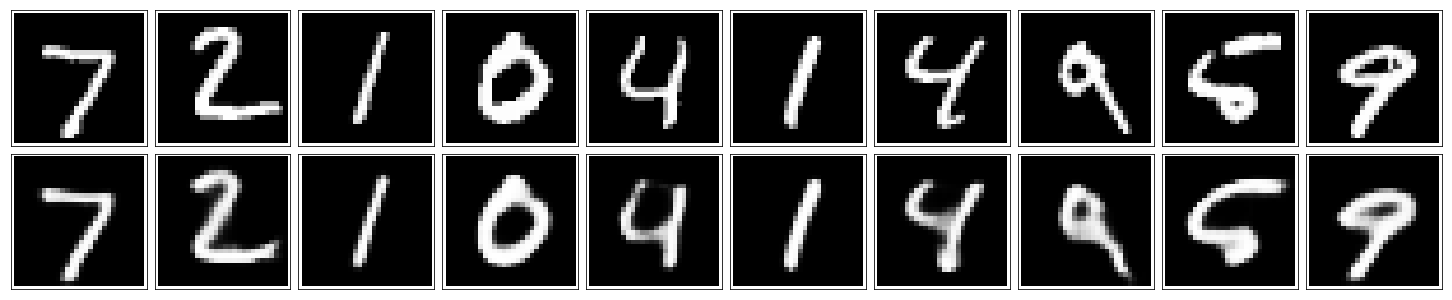

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [19]:
sess.close()

## Denoising

As I've mentioned before, autoencoders like the ones you've built so far aren't too useful in practive. However, they can be used to denoise images quite successfully just by training the network on noisy images. We can create the noisy images ourselves by adding Gaussian noise to the training images, then clipping the values to be between 0 and 1. We'll use noisy images as input and the original, clean images as targets. Here's an example of the noisy images I generated and the denoised images.

![Denoising autoencoder](assets/denoising.png)


Since this is a harder problem for the network, we'll want to use deeper convolutional layers here, more feature maps. I suggest something like 32-32-16 for the depths of the convolutional layers in the encoder, and the same depths going backward through the decoder. Otherwise the architecture is the same as before.

> **Exercise:** Build the network for the denoising autoencoder. It's the same as before, but with deeper layers. I suggest 32-32-16 for the depths, but you can play with these numbers, or add more layers.

In [21]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [22]:
sess = tf.Session()

In [ ]:
epochs = 100
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

## Checking out the performance

Here I'm adding noise to the test images and passing them through the autoencoder. It does a suprising great job of removing the noise, even though it's sometimes difficult to tell what the original number is.

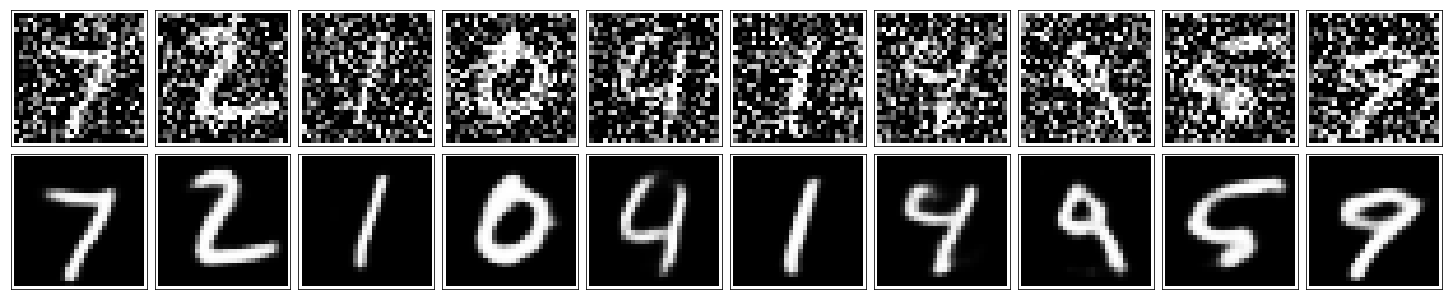

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)